### General imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image, ImageEnhance

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse


### Auxiliary functions

In [2]:
def render_images(images):
    """Renders images
    
    Args:
        images: dictionary with images
    """
    
    # TODO: Develop function to render images. Make sure to have a descriptive caption for each image
    
    for img_name, imgs in images.items():
        # plt.figure()
        plt.imshow(imgs)
        plt.title(img_name)
        plt.show()
    
    pass

In [3]:
def load_images(names, render=True):
    """Loads images from files and renders them, if necessary

    Args:
        names: list of image files to load
        render: flag that defines if image should be rendered

    Returns:
        Dictionary with loaded images
    """

    # TODO: Develop function to load images from files
    img_dic = {}
    
    for names_list in names:
        img_read = Image.open(names_list)
        img_dic[names_list] = img_read
        
    images = render_images(img_dic)
    
    return images

## 1 Manipulation of camera settings in Manual mode

### 1.1 Variation of shutter speed

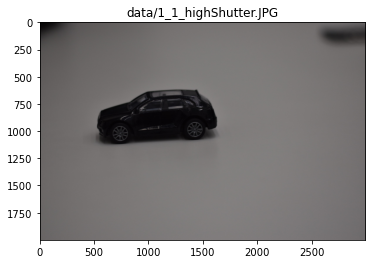

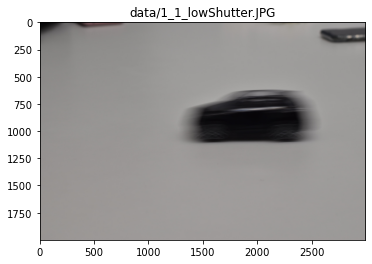

In [4]:
# TODO: Load and render images
# Total: 2 images

load_images(['data/1_1_highShutter.JPG', 'data/1_1_lowShutter.JPG']);


### 1.2 Variation of white balance

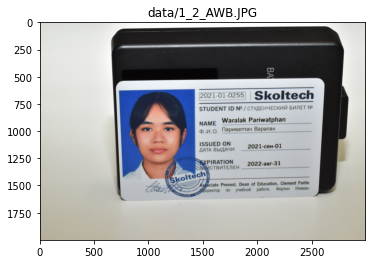

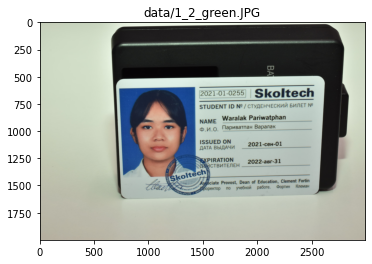

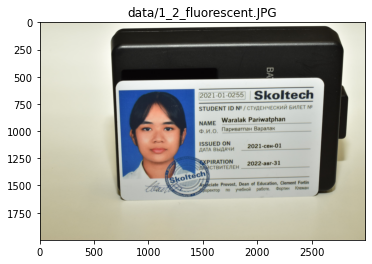

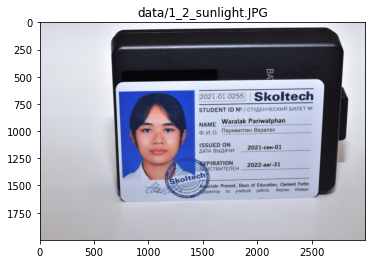

In [5]:
# TODO: Load and render images
# Total: 4 images

load_images(['data/1_2_AWB.JPG', 'data/1_2_green.JPG', 'data/1_2_fluorescent.JPG', 'data/1_2_sunlight.JPG']);

### 1.3 Variation of ISO

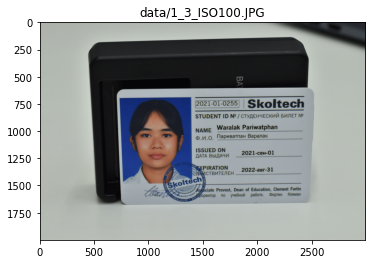

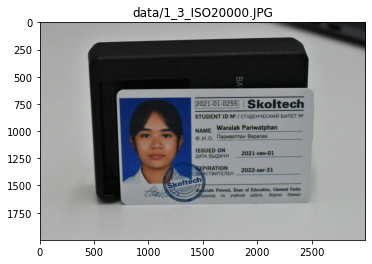

In [6]:
# TODO: Load and render images
# Total: 2 images

load_images(['data/1_3_ISO100.JPG', 'data/1_3_ISO20000.JPG']);

## 2 Investigation of impact from lens aperture and additional optical components

### 2.1 Exploring polarization of light

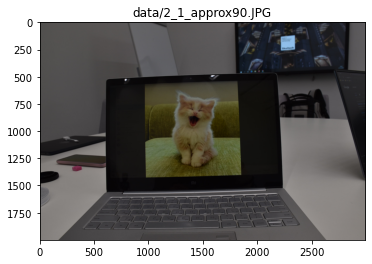

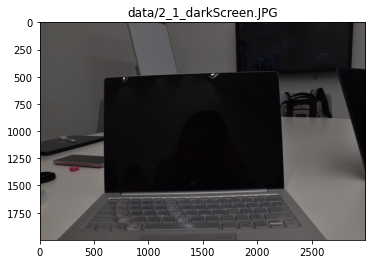

In [7]:
# TODO: Load and render images
# Total: 2 images

load_images(['data/2_1_approx90.JPG', 'data/2_1_darkScreen.JPG']);

### 2.2 Exploring depth of field

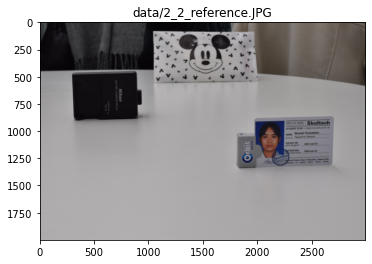

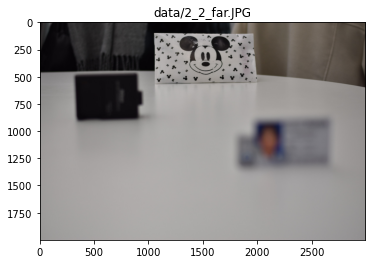

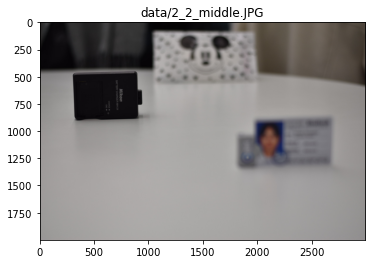

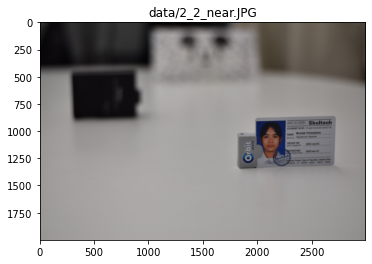

In [8]:
# TODO: Load and render images
# Total: 4 images

load_images(['data/2_2_reference.JPG', 'data/2_2_far.JPG', 'data/2_2_middle.JPG', 'data/2_2_near.JPG']);

## 3 Processing of acquired datasets

### 3.1 Exploring image comparison metrics

*`TODO`*: Explain which components the Structural Similarity Index Measure1 (SSIM) consists of.

In [10]:
# TODO: Add code to demonstrate scenario when SSIM is superior to MSE

# (1) ANS: SSIM consists of 3 comparison measurements between the samples of x and y
#          1) luminance(l) (2) contrast(c) (3) structure(s)
# (2) ANS: SSIM can identify better than MSE if the photo was change a lot. As you can see, 
#          when I changed image contrast from 1.2 to 1.5, SSIM change -9% but MSE increase 3 times.
#          So, SSIM is better when we don't pay attention to the other factor of image (e.g. contrast, brightness).
import cv2
# increase contrast 20%
factor = 1.2
img_ori = Image.open('data/1_2_AWB.JPG')
enhancer = ImageEnhance.Contrast(img_ori)
im_output = enhancer.enhance(factor)
im_output.save('more-contrast-image.JPG')

# increase contrast 50%
factor_15 = 1.5
enhancer_15 = ImageEnhance.Contrast(img_ori)
im_output_15 = enhancer.enhance(factor_15)
im_output_15.save('more-contrast-image_15.JPG')

img_ref = cv2.imread('data/1_2_AWB.JPG')
img_contrast = cv2.imread('more-contrast-image.JPG')
img_contrast_15 = cv2.imread('more-contrast-image_15.JPG')

ssim_im = ssim(img_ref, img_contrast, multichannel=True)
mse_im = mse(img_ref, img_contrast)

ssim_im_15 = ssim(img_ref, img_contrast_15, multichannel=True)
mse_im_15 = mse(img_ref, img_contrast_15)

print('Contrast 1.2')
print(f'SSIM: {ssim_im}, MSE: {mse_im}')

print('Contrast 1.5')
print(f'SSIM: {ssim_im_15}, MSE: {mse_im_15}')

Contrast 1.2
SSIM: 0.8493522903047522, MSE: 201.47085015597148
Contrast 1.5
SSIM: 0.7629612629767656, MSE: 602.9824629567736


### 3.2 Depth of field dataset processing

In [11]:
# TODO: Compare near, middle and far images with the reference using MSE/SSIM

img_ref = cv2.imread('data/2_2_reference.JPG')
img_near = cv2.imread('data/2_2_near.JPG')
img_mid = cv2.imread('data/2_2_middle.JPG')
img_far = cv2.imread('data/2_2_far.JPG')

ssim_near = ssim(img_ref, img_near, multichannel=True)
ssim_mid = ssim(img_ref, img_mid, multichannel=True)
ssim_far = ssim(img_ref, img_far, multichannel=True)

mse_near = mse(img_ref, img_near)
mse_mid = mse(img_ref, img_mid)
mse_far = mse(img_ref, img_far)

items = ['Near', 'Middle', 'Far']
ssim_all = [ssim_near, ssim_mid, ssim_far]
mse_all = [mse_near, mse_mid, mse_far]
for i in range(3):
    print('{0:<8}({1:<12}| ref): {2:.8f}'.format('SSIM', items[i], ssim_all[i]))
    print('{0:<8}({1:<12}| ref): {2:.8f}'.format('MSE', items[i], mse_all[i]))
    
# The reference picture is focused in the middle, so when we compare the ref and middle pic, ssim is the highest 
# and mse is loewst.

SSIM    (Near        | ref): 0.90956663
MSE     (Near        | ref): 324.58297360
SSIM    (Middle      | ref): 0.92756273
MSE     (Middle      | ref): 162.18685584
SSIM    (Far         | ref): 0.90440232
MSE     (Far         | ref): 363.26511731


In [11]:
def process_dof_image(image):
    """Modifies input image to improve comparison metric score

    Args:
        image: input image

    Returns:
        Modified image
    """

    # TODO: Develop image processing approach to make near, middle and far images look more like the reference image
    
    result = image
    
    return result

In [12]:
# TODO: Compare modified near, middle and far images with the reference using MSE/SSIM
print('{0:<8}({1:<12}| ref): {2:.8f}'.format('Metric', 'Image* ID', 0.0))

Metric  (Image* ID   | ref): 0.00000000


In [13]:
# TODO: Render improved images side by side with reference

### 3.3 ISO dataset processing

In [91]:
# TODO: Compare ISO 100 and ISO 20000 images using MSE/SSIM

img_iso1 = cv2.imread('data/1_3_ISO100.JPG')
img_iso20 = cv2.imread('data/1_3_ISO20000.JPG')

ssim_iso = ssim(img_iso1, img_iso20, multichannel=True)
mse_iso = mse(img_iso1, img_iso20)

print('{0:<8}(ISO100   | ISO20000 ): {1:.8f}'.format('SSIM', ssim_iso))
print('{0:<8}(ISO100   | ISO20000 ): {1:.8f}'.format('MSE', mse_iso))

SSIM    (ISO100   | ISO20000 ): 0.84625912
MSE     (ISO100   | ISO20000 ): 268.86623507


*`TODO`*: Describe both images qualitatively. What is the main difference in thier appearance?

Ans: The main difference in thier appearance is ISO. When I set the ISO too high(e.g. 20000), image quality was bad because it has noise. On the other hand, when I set the ISO in the normal level (e.g. 100), image quality was good because it has noise less than ISO20000.

In [15]:
def process_iso_image(image):
    """Modifies input image to improve comparison metric score

    Args:
        image: input image

    Returns:
        Modified image
    """

    # TODO: Develop image processing approach to improve comparison metric score
    
    result = image
    
    return result

In [16]:
# TODO: Compare modified ISO 100 and modified ISO 20000 images using MSE/SSIM
print('{0:<8}(ISO100*  | ISO20000*): {1:.8f}'.format('Metric', 0.0))

Metric  (ISO100*  | ISO20000*): 0.00000000


### 3.4 Shutter speed dataset processing

In [92]:
# TODO: Describe with 1–2 sentences
#  OR
# TODO: Add code to measure object speed knowing the shutter speed

# print('Object speed: {0:.4f} m/s'.format(0.0))


### ANS: We can measure the object speed if we know shutter speed. For example, we can approximate the object speed
###      if we take the photo and that photo has a good focus (picture is clear and sharp/high frequency).
###      If shutter speed is 1/200, it means 1/2 hundred of a second (or 5 milliseconds).

### 3.5 Polarization dataset processing

In [18]:
def find_segmentation(on_state, off_state):
    """Finds screen segmentation using images captured with different polarization state.

    Args:
        on_state: image with bright screen
        off_state: image with faded screen
    
    Returns:
        Image with screen segmentation
    """    

    result = on_state
    
    # TODO: Add code to find screen segmentation using images captured with different polarization state
    
    return result

In [19]:
# TODO: Test find_segmentation() using images from polarization dataset
# TODO: Render image with screen segmentation

### 3.6 White balance dataset processing

In [119]:
def plot_hist(image):
    """Plots per-channel histogram of the image.

    Args:
        image: input color image
        ax: matplotlib axes object to use for visualization
    """ 

    # TODO: Add code to visualize histogram of each channel of the image
    
    image_obj = cv2.imread(image)
 
    blue = cv2.calcHist([image_obj], [0], None, [256], [0, 256])
    red = cv2.calcHist([image_obj], [1], None, [256], [0, 256])
    green = cv2.calcHist([image_obj], [2], None, [256], [0, 256])
   
    plt.title(str(image))
    plt.axis("off")
    #plt.imshow(cv2.cvtColor(image_obj, cv2.COLOR_BGR2RGB))
    plt.hist(blue, color="blue")
    plt.hist(green, color="green")
    plt.hist(red, color="red")
    plt.show()

    pass

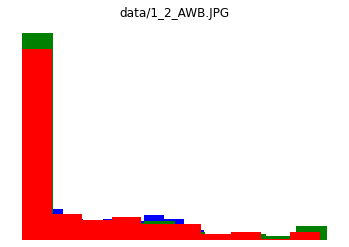

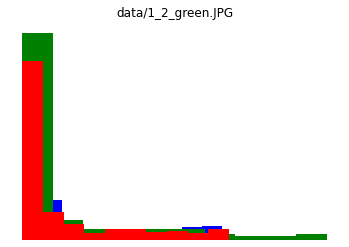

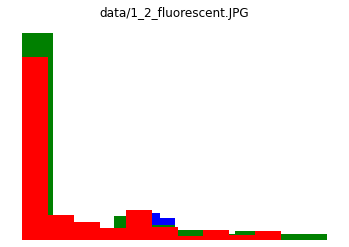

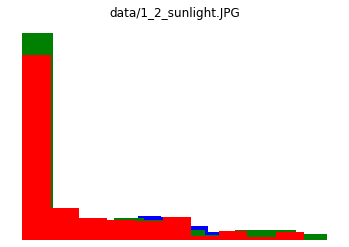

In [123]:
# fig = plt.figure(figsize=(16, 18))
# fig.subplots_adjust(hspace=0.3)

# TODO: Render histogram for each image in White balance dataset using plot_hist() function
plot_hist('data/1_2_AWB.JPG')
plot_hist('data/1_2_green.JPG')
plot_hist('data/1_2_fluorescent.JPG')
plot_hist('data/1_2_sunlight.JPG')

*`TODO`*: Describe qualitatively where the histograms are different and explain why.

ANS: The histograms are different, especially for the red color in RGB. In the green filter, red color was reduced the most. In fluorescent, the red color was reduced a bit when compare to AWB and in sunlight, all 3 color are quite similar to the AWB.